# Clients outflow

<div style="font-size: 15px">
    
**Project Description:**
    

Customers began to leave Beta Bank. Every month. A little, but noticeable. Bank marketers have calculated that it is cheaper to retain current customers than to attract new ones.

It is necessary to predict whether the client will leave the bank in the near future or not. We are presented with historical data on the behavior of customers and the termination of contracts with the bank.

<h1>Table of contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory data analysis</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imbalance solving</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model testing</a></span></li></ul></div>

**Features**


RowNumber — index of the row in the data


CustomerID — the unique identifier of the customer


Surname — last name


CreditScore — credit rating


Geography — country of residence


Gender — gender


Age — age


Tenure — how many years a person has been a bank customer


Balance — account balance


NumOfProducts — the number of bank products used by the customer


HasCrCard — availability of a credit card


IsActiveMember — client activity


EstimatedSalary — estimated salary


**Target**


Exited — the fact of the client's departure

## 1. Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats as st
import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import mean_squared_error, accuracy_score, precision_recall_curve

from sklearn.utils import shuffle

In [2]:
# Disable Anaconda warnings
warnings.simplefilter('ignore')

# Default graph size
from pylab import rcParams
rcParams['figure.figsize'] = 16, 9

# Setting the maximum number of columns of the dateframe to be displayed
pd.set_option('display.max_columns',None)

In [3]:
data = pd.read_csv('Churn.csv')

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [6]:
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6672,6673,15660403,Fleming,827,Spain,Female,35,NaN,0.00,2,0,1,184514.01,0
6862,6863,15736287,Piccio,586,France,Male,33,9.0,0.00,1,1,0,6975.02,0
9456,9457,15723604,Collins,639,France,Male,39,6.0,150555.83,1,1,0,30414.17,0
2044,2045,15566494,Fang,487,France,Male,45,2.0,0.00,2,1,0,77475.73,0
6931,6932,15808930,Mai,531,France,Female,37,1.0,0.00,1,1,0,4606.97,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Tenure - the only column with 909 None values

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


We will rename the columns to lower case for further use, and also eliminate the combination of words

In [9]:
data.columns = data.columns.str.lower()

data.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [10]:
data.columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited']
data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [11]:
print('Unique surnames: {} - among which the most popular are (top 10):'.format(len(data['surname'].unique())))
data['surname'].value_counts(ascending=False).head(10)

Unique surnames: 2932 - among which the most popular are (top 10):


Smith       32
Martin      29
Scott       29
Walker      28
Brown       26
Shih        25
Yeh         25
Genovese    25
Maclean     24
Wright      24
Name: surname, dtype: int64

In [12]:
data['credit_score'].value_counts()

850    233
678     63
655     54
667     53
705     53
      ... 
412      1
351      1
365      1
373      1
423      1
Name: credit_score, Length: 460, dtype: int64

In [13]:
print(f'Number of unique client IDs: {len(data.customer_id.unique())}')

Number of unique client IDs: 10000


[]

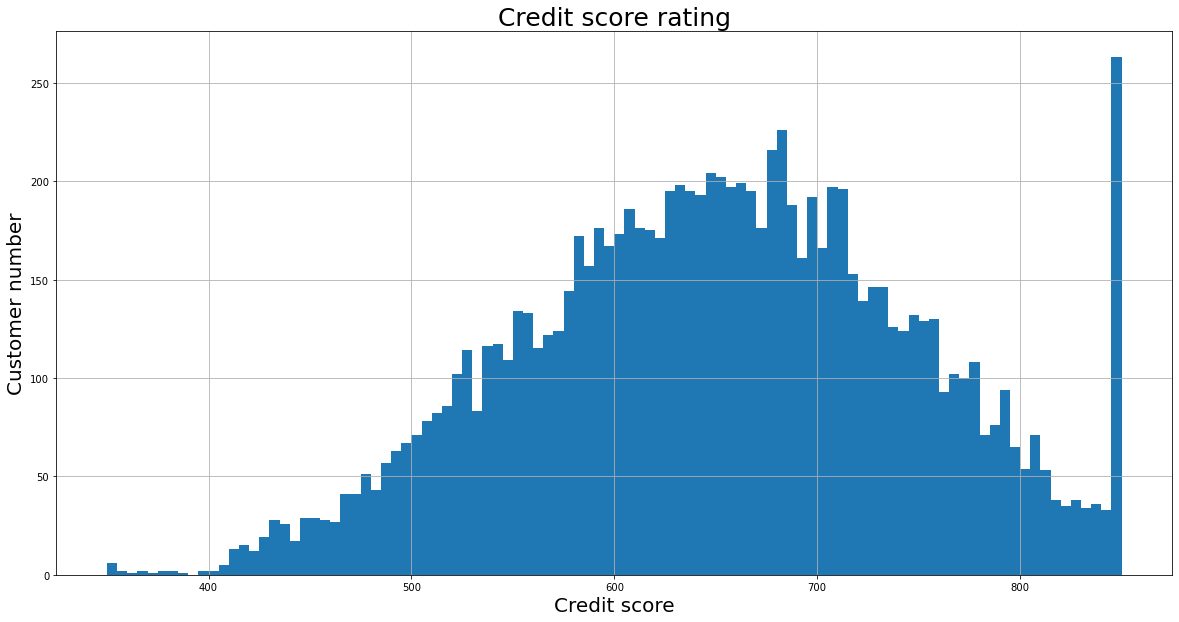

In [14]:
data.credit_score.hist(bins=100, figsize=(20,10))
plt.xlabel('Credit score', size=20)
plt.ylabel('Customer number', size=20)
plt.title('Credit score rating', size=25)
plt.plot()

The credit rating of consumers has a generally normal distribution, which generally allows us to use standard approaches for analyzing this column. However, it should be noted that there is a large group of clients with a credit rating of 850 points (more than 250 people). Since this fact cannot affect the final conclusions of our analysis, we will not discard this group from the data. Moreover, as part of an additional analysis, we can try to identify the distinctive features of this category of users in order to form special products / programs of the bank for them.  

In [15]:
print('The data includes representatives of the following countries:')
data.geography.value_counts()

The data includes representatives of the following countries:


France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

In [16]:
print('and the following gender:')
data.gender.value_counts()

and the following gender:


Male      5457
Female    4543
Name: gender, dtype: int64

Let's consider the distribution of the age of clients in the data

[]

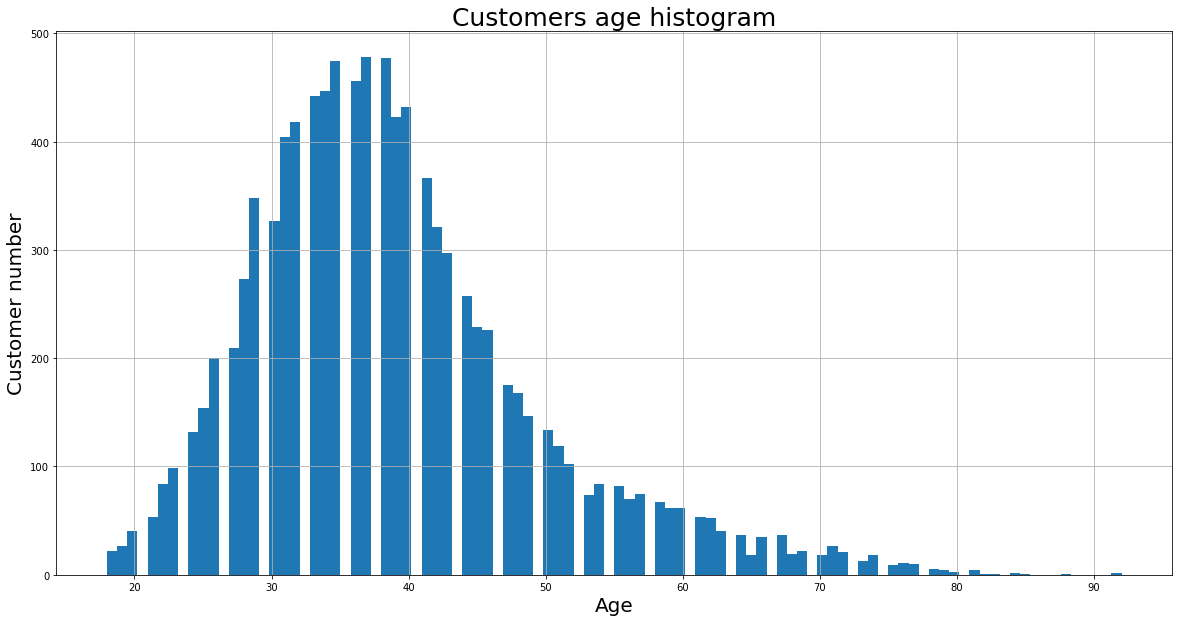

In [17]:
data.age.hist(bins=100, figsize=(20,10))
plt.xlabel('Age', size=20)
plt.ylabel('Customer number', size=20)
plt.title('Customers age histogram', size=25)
plt.plot()

Age groups have the form of a normal distribution (with a shift to the left). The main category of clients aged 25 to 50 years.

The only column in which missing values were detected is **tenure**. Let's check in which lines they occur for a possible pattern. 

In [18]:
data[data['tenure'].isna()].sample(10)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
351,352,15593365,Shih,762,Spain,Male,39,NaN,81273.13,1,1,1,18719.67,0
1148,1149,15616529,Hsieh,613,Spain,Male,34,NaN,0.00,1,1,1,41724.72,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0
9113,9114,15760662,Francis,521,Germany,Female,29,NaN,87212.80,1,1,1,994.86,0
4481,4482,15659234,Y?,494,France,Male,30,NaN,85704.95,1,0,1,27886.06,0
9938,9939,15593496,Korovin,526,Spain,Female,36,NaN,91132.18,1,0,0,58111.71,0
1309,1310,15690079,Boniwell,591,Spain,Male,30,NaN,124857.69,2,0,0,50485.70,0
99,100,15633059,Fanucci,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
9306,9307,15643330,Chukwuemeka,594,France,Male,37,NaN,0.00,2,0,1,95864.50,0
7013,7014,15599440,McGregor,748,France,Female,34,NaN,0.00,2,1,0,53584.03,0


In [19]:
print(f"The share of missing values from the total number: {len(data[data['tenure'].isna()])/ (len(data)) * 100}%")

The share of missing values from the total number: 9.09%


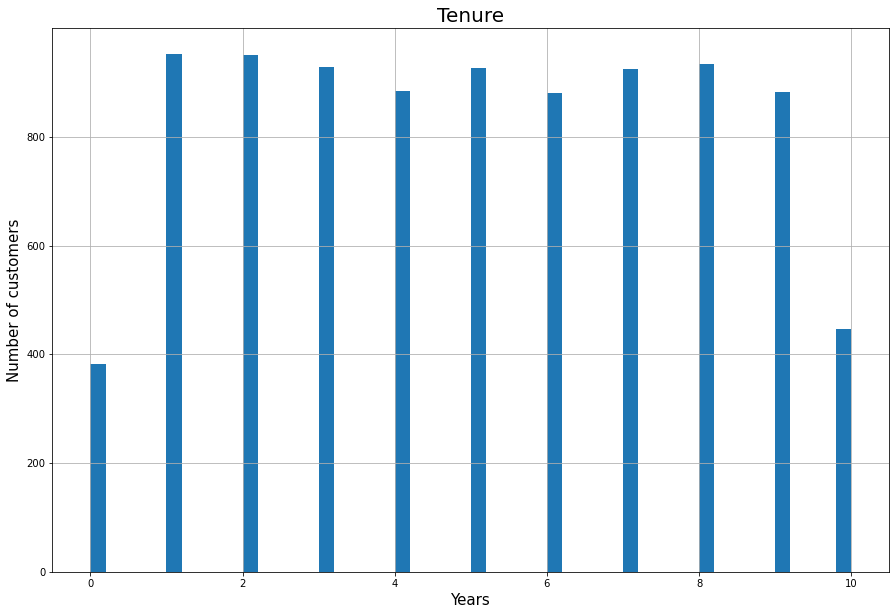

In [20]:
#Let's look at the distribution of clients by the duration of use of the bank's services

data.tenure.hist(bins=50, figsize=(15,10))
plt.xlabel('Years', size=15)
plt.ylabel('Number of customers', size=15)
plt.title('Tenure', size=20)
plt.show()

The majority of clients use services from 1 to 9 years. Of particular interest are clients who use services up to a year and more than 9 years. One of the possible issues to pay attention to in the future is the reasons for clients leaving before a year (perhaps after the first year, clients begin to receive any special conditions/ programs that make the bank attractive) and what so significantly affects leaving for another bank after 9 years of using its services (perhaps there are no special privileged conditions for such clients).

Let's estimate the proportion of clients who did not specify the duration of using the bank's services and stopped using its services, relative to all who did not specify the duration.

In [21]:
print(len(data.loc[(data['tenure'].isna() == True) & (data['exited'] == 1)]) / len(data[data['tenure'].isna() == True]) * 100)

20.13201320132013


Taking into account that:


1) the share of clients who did not specify the duration of using the bank's services is 9%;

2) there is no pattern in these missing vaues (there are representatives of all countries and ages, with different account balances), 


3) it is not possible to reliably determine the reasons for the missing values, and replacing with average values or median may affect the results of the study;


4) The values considered in the column **tenure** actually reflect the full years of using the bank's services (although expressed in real numbers);


5) Columns **surname, row_number** have no practical significance for further research;


**proposed**: 

1) delete rows with gaps in the column **tenure** from the dataframe;


2) convert the values of the column **tenure** to the type **int64**;


3) remove columns **surname, row_number** from the dataframe.

In [22]:
# Deleting rows with tenure == None
data.dropna(inplace=True, axis=0)

#convert the values in the Tenure column to int64
data['tenure'] = data['tenure'].astype('int64')

# Deleting surname column
data = data.drop(['surname', 'row_number'], axis=1)

In [23]:
# Let's check the results of the transformations
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9091 non-null   int64  
 1   credit_score      9091 non-null   int64  
 2   geography         9091 non-null   object 
 3   gender            9091 non-null   object 
 4   age               9091 non-null   int64  
 5   tenure            9091 non-null   int64  
 6   balance           9091 non-null   float64
 7   num_of_products   9091 non-null   int64  
 8   has_cr_card       9091 non-null   int64  
 9   is_active_member  9091 non-null   int64  
 10  estimated_salary  9091 non-null   float64
 11  exited            9091 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 923.3+ KB


In [24]:
# Let's estimate the number of bank products held by clients
data.num_of_products.value_counts()

1    4617
2    4184
3     234
4      56
Name: num_of_products, dtype: int64

In [25]:
# We will evaluate the presence/absence of a credit card
data.has_cr_card.value_counts()

1    6409
0    2682
Name: has_cr_card, dtype: int64

In [26]:
# Let's evaluate user activity
data['is_active_member'].value_counts()

1    4687
0    4404
Name: is_active_member, dtype: int64

In [27]:
# Let's estimate the share of clients who stopped using the bank's services
print("The share of clients who stopped using the bank's services is {:.2%}".format(data.exited.mean()))

The share of clients who stopped using the bank's services is 20.39%


There is an **imbalance of classes**. First, we will train the model without taking into account the imbalance, and later - with its elimination.

Let's check the distribution of the estimated salary of the bank's clients. Perhaps the clients are representatives with a strictly defined income.

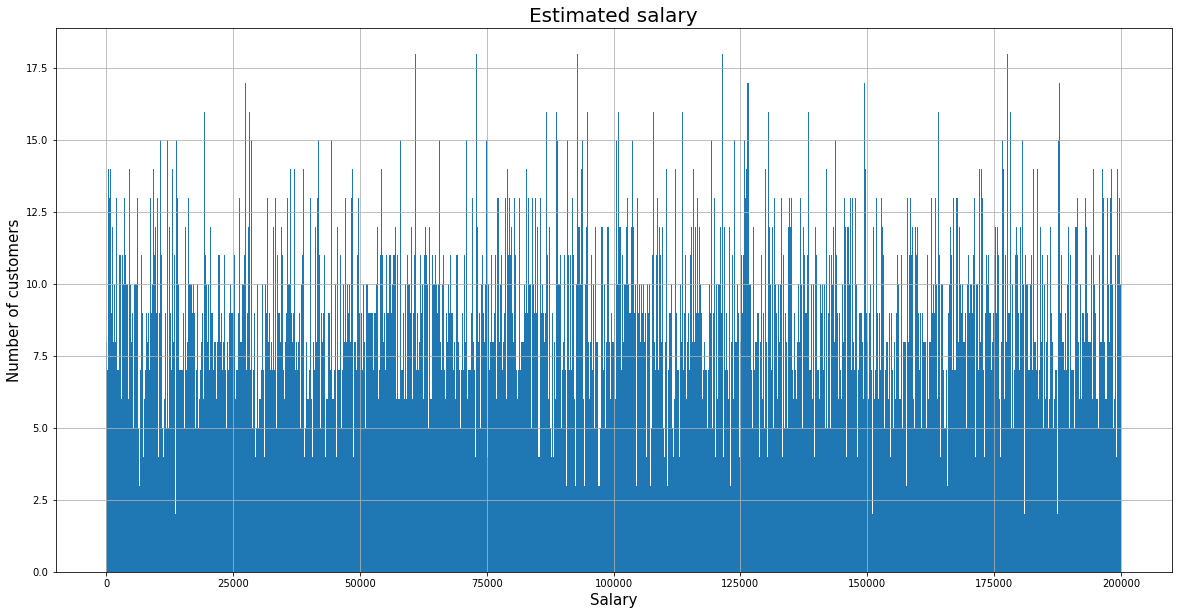

In [28]:
# Let's look at the distribution of the estimated salary
data.estimated_salary.hist(bins=1000, figsize=(20,10))
plt.xlabel('Salary', size=15)
plt.ylabel('Number of customers', size=15)
plt.title('Estimated salary', size = 20)
plt.show()

Clients' income vary significantly. It is not possible to identify any exact pattern. Categorization of clients depending on the level of income for further analysis is impractical due to the use of simple machine learning algorithms.

The categorical data of the geography and gender columns for further analysis should be converted into a numerical format by the direct coding technique (One-Hot-Encoding)

In [29]:
gender_ohe = pd.get_dummies(data['gender'], drop_first=True)

country_ohe = pd.get_dummies(data['geography'], drop_first=True)

# deleting gender and geography columns
data.drop(['gender', 'geography'], axis=1, inplace=True)

# Let's merge existing dataframe with gender_ohe and country_ohe
data_ohe = pd.concat([data, gender_ohe, country_ohe], axis=1)

data_ohe.columns = data_ohe.columns.str.lower()
data_ohe.head()

,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,male,germany,spain
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


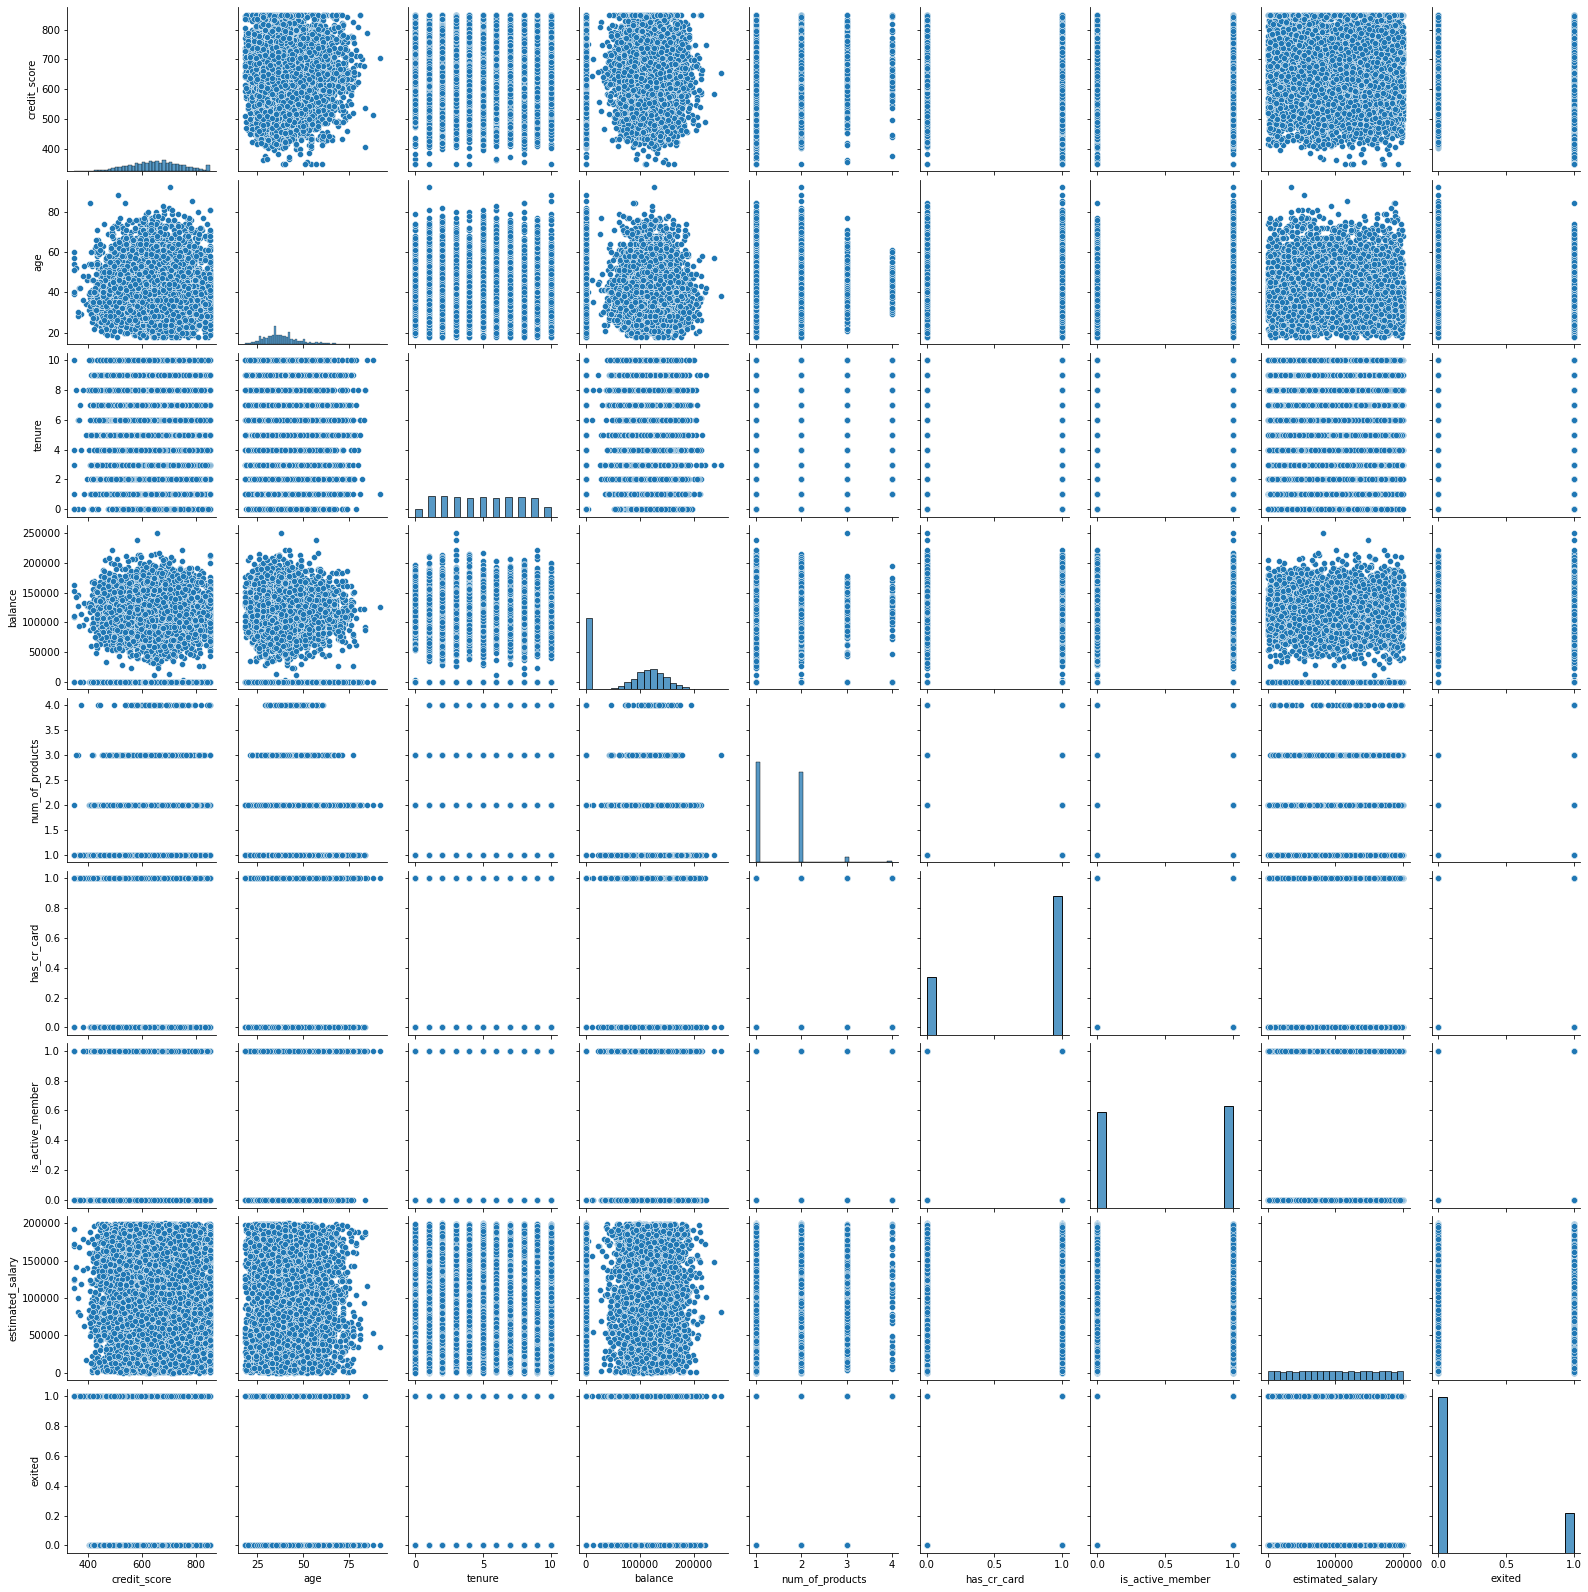

In [30]:
sns.pairplot(data_ohe.drop(['customer_id', 'germany', 'spain', 'male'], axis=1))

plt.show()

<div style="font-size: 20px">
    
**Intermediate conclusion:**

1) The original data is presented in a dataframe of 10,000 by 14. There are 2932 unique surnames in the **surname** column, which makes it possible to make an assumption about the possibility of allocating the most frequent surnames into a separate feature, however, to build simple machine learning algorithms, it was decided to discard it. 


2) The bank's clients are representatives of only 3 countries: France, Germany and Spain. 


3) In the distribution of the target attribute (the fact of the client's departure), a significant imbalance is noticeable (the proportion of those using services to those who have stopped is 4:1)

4) 909 clients had no information about the duration of using the bank's services, and since the ratio of the target attribute in them is the same as in the general population (4:1), it was decided to exclude these lines. 

5) To convert the categorical features of geography and gender to a numerical type, the One Hot Encoding technique was used with the avoidance of a dummy trap. 

6) There is no mutual correlation between the data, therefore, there is no need to exclude the signs. 

## 2.  Exploratory data analysis

<div style="font-size: 15px">
    
**Splitting into training, validation and test samples:**

In [31]:
# Splitting into training, validation and test samples: 60%:20%:20%. 
train, valid_test = train_test_split(data_ohe, train_size=0.6, random_state=12345, stratify=data_ohe['exited'])
valid, test = train_test_split(valid_test, train_size=0.5, random_state=12345, stratify=valid_test['exited'])

In [32]:
print(f'Train sample contains {train.shape[0]} rows, validation - {valid.shape[0]} and test - {test.shape[0]}')

Train sample contains 5454 rows, validation - 1818 and test - 1819


In [33]:
#Let's highlight features and targets
train_features = train.drop('exited', axis=1)
valid_features = valid.drop('exited', axis=1)
test_features = test.drop('exited', axis=1)

train_target = train['exited']
valid_target = valid['exited']
test_target = test['exited']

<div style="font-size: 15px">
    
**Scaling of the features:**

Depending on the selected column, the data has a significant difference in the spread of values. Since this may negatively affect the training of models in the future, **we normalize the data**.

**However**, since scaling the features of the entire dataset can lead to data leakage, we will train the scaler only on the training sample, and then apply it to the validation and test.

In [34]:
# data normalization
numeric_colm = ['credit_score', 'age', 'balance', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(train_features[numeric_colm])
pd.options.mode.chained_assignment = None

train_features[numeric_colm] = scaler.transform(train_features[numeric_colm])

train_features.head()

,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,male,germany,spain
9723,15612832,-1.292898,-0.660843,7,0.786636,1,0,0,-0.223548,1,0,0
1224,15628298,-1.563714,0.778434,8,0.833795,1,1,0,1.383021,0,0,1
8377,15567147,1.581914,0.106771,4,-1.222967,2,1,1,-0.308331,1,0,1
8014,15644295,0.842379,0.010820,2,0.807063,1,1,1,-0.430980,0,0,1
2491,15764174,-0.397123,-1.236554,4,-1.222967,2,1,1,1.392642,0,0,1


Let's apply scaler to validation and test features

In [35]:
valid_features[numeric_colm] = scaler.transform(valid_features[numeric_colm])

valid_features.head()

,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,male,germany,spain
7493,15683276,-0.417955,-0.181084,10,1.023931,2,1,1,0.519901,0,0,1
5460,15668894,0.113260,0.202723,5,0.738812,2,0,1,0.364920,1,1,0
9126,15666095,1.071531,1.162241,4,0.054632,2,0,1,-0.545522,1,0,1
9801,15578878,-0.845011,-0.852747,3,1.010554,1,1,1,-1.154323,0,0,1
9101,15660980,-0.553363,-0.085132,6,0.629162,2,1,1,-1.296336,1,0,1


In [36]:
test_features[numeric_colm] = scaler.transform(test_features[numeric_colm])

test_features.head()

,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,male,germany,spain
4126,15664759,0.259084,-0.660843,10,-1.222967,2,1,0,1.597110,1,0,1
5145,15680597,1.394426,-0.085132,1,0.994334,1,1,1,1.253399,1,1,0
9253,15667321,-0.063812,0.970338,10,-1.222967,2,1,1,0.789730,1,0,1
6757,15766667,0.696555,-0.277036,2,0.425659,2,0,1,-0.877030,1,0,1
9739,15797293,0.279916,-1.332505,3,-1.222967,2,1,0,1.389657,0,0,0


The splitting into training (60%), validation (20%) and test (20%) samples from the original dataframe was made. In addition, a number of features have been normalized.

<div style="font-size: 15px">
    
**Training of the model without taking into account the imbalance of classes:**

It is proposed to consider the following models:

* Static model;

* Decision Tree;

* Random Forest;

* Logistic regression.

In [37]:
def f1_estimate(y_test,y_pred):
    return f1_score(y_test, y_pred, labels=np.unique(y_pred))

In [38]:
# static model
train_pred_const = pd.Series(0, index=train.index)
valid_pred_const = pd.Series(0, index=valid.index)

In [39]:
# Creating a dataframe for temporary storage of metric results

temp_info_1 = pd.DataFrame({'model':['Static model'], 'is_balansed':[None]})

temp_info_train = pd.DataFrame(
    {'accuracy':[accuracy_score(train_target, train_pred_const)],
     'recall':[recall_score(train_target, train_pred_const)],
     'precision':[precision_score(train_target, train_pred_const)],
     'f1':[f1_estimate(train_target, train_pred_const)],
     'auc_roc':[0.5]})
    
temp_info_valid = pd.DataFrame(
    {'accuracy':[accuracy_score(valid_target, valid_pred_const)],
     'recall':[recall_score(valid_target, valid_pred_const)],
     'precision':[precision_score(valid_target, valid_pred_const)],
     'f1':[f1_estimate(valid_target, valid_pred_const)],
     'auc_roc':[0.5]})

# let's merge the results
temp_info = pd.merge(
    pd.merge(
        temp_info_1, temp_info_train, 
        left_index=True, right_index=True),
    temp_info_valid,
    left_index=True, right_index=True,
    suffixes=['_train', '_valid'])

temp_info

,model,is_balansed,accuracy_train,recall_train,precision_train,f1_train,auc_roc_train,accuracy_valid,recall_valid,precision_valid,f1_valid,auc_roc_valid
0,Static model,None,0.796113,0.0,0.0,0.0,0.5,0.79593,0.0,0.0,0.0,0.5


In [40]:
def metrics(model, balansed, model_name, train_features,
            train_target, valid_features, valid_target,
            print_data = False):
    global temp_info
    
    # Metrics on the training sample
    predicted_train = model.predict(train_features)
    probabilities_train = model.predict_proba(train_features)
    probabilities_one_train = probabilities_train[:,1]
    
    accuracy_train = accuracy_score(train_target, predicted_train)
    precision_train = precision_score(train_target, predicted_train)
    recall_train = recall_score(train_target, predicted_train)
    f1_train = f1_estimate(train_target, predicted_train)
    roc_auc_train = roc_auc_score(train_target, probabilities_one_train)
    if print_data:
        print("Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}"
              .format(accuracy_train, precision_train, recall_train, f1_train)
             )
        
    # Metrics on the validation sample
    predicted_valid = model.predict(valid_features)
    probabilities_valid = model.predict_proba(valid_features)
    probabilities_one_valid = probabilities_valid[:,1]
    
    accuracy_valid = accuracy_score(valid_target, predicted_valid)
    precision_valid = precision_score(valid_target, predicted_valid)
    recall_valid = recall_score(valid_target, predicted_valid)
    f1_valid = f1_estimate(valid_target, predicted_valid)
    roc_auc_valid = roc_auc_score(valid_target, probabilities_one_valid)
    if print_data:
        print("Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}"
              .format(accuracy_valid, precision_valid, recall_valid, f1_valid)
             )
        
    temp = pd.Series(
        [model_name, balansed,accuracy_train, 
         precision_train, recall_train, f1_train, roc_auc_train,
        accuracy_valid, precision_valid, recall_valid, f1_valid, roc_auc_valid],
        index=temp_info.columns)
    
    # Let's store the results 
    temp_info = temp_info.append(temp, ignore_index=True)

In [41]:
def model_testing(train_features, train_target,
                  valid_features, valid_target,
                  class_weight, balanced_type):
    
    # Decision tree
    for depth in range(1,101,1):
        model = DecisionTreeClassifier(max_depth=depth,
                                      random_state=12345,
                                      class_weight=class_weight)
        model.fit(train_features, train_target)
        metrics(model, balanced_type, 'Decision tree: {}'.format(depth),
               train_features, train_target, valid_features, valid_target)
        
    # Random Forest
    for est in range(1,101,1):
        model = RandomForestClassifier(n_estimators=est,
                                       random_state=12345,
                                       class_weight=class_weight)
        model.fit(train_features, train_target)
        metrics(model, balanced_type, 'Random Forest: {}'.format(est), train_features, train_target, valid_features, valid_target)
        
    # Logistic regression
    model = LogisticRegression(random_state=12345,
                               solver='liblinear',
                               class_weight=class_weight)
    model.fit(train_features, train_target)
    metrics(model, balanced_type, 'Logistic regression', 
                   train_features, train_target, valid_features, valid_target)
                  

In [42]:
model_testing(train_features,
              train_target,
              valid_features,
              valid_target, None, None)
temp_info.sort_values(by='f1_valid', ascending=False)

,model,is_balansed,accuracy_train,recall_train,precision_train,f1_train,auc_roc_train,accuracy_valid,recall_valid,precision_valid,f1_valid,auc_roc_valid
177,Random Forest: 77,None,1.000000,1.000000,1.000000,1.000000,1.000000,0.868537,0.792035,0.482480,0.599665,0.873207
7,Decision tree: 7,None,0.878805,0.835067,0.505396,0.629692,0.884046,0.865787,0.767932,0.490566,0.598684,0.833998
179,Random Forest: 79,None,1.000000,1.000000,1.000000,1.000000,1.000000,0.867437,0.787611,0.479784,0.596315,0.873265
197,Random Forest: 97,None,1.000000,1.000000,1.000000,1.000000,1.000000,0.866337,0.778261,0.482480,0.595674,0.871587
175,Random Forest: 75,None,1.000000,1.000000,1.000000,1.000000,1.000000,0.866887,0.784141,0.479784,0.595318,0.872358
...,...,...,...,...,...,...,...,...,...,...,...,...
101,Random Forest: 1,None,0.920975,0.803206,0.811151,0.807159,0.880126,0.777778,0.455285,0.452830,0.454054,0.656961
102,Random Forest: 2,None,0.924826,0.973046,0.649281,0.778857,0.956118,0.816282,0.625850,0.247978,0.355212,0.729028
0,Static model,None,0.796113,0.000000,0.000000,0.000000,0.500000,0.795930,0.000000,0.000000,0.000000,0.500000
1,Decision tree: 1,None,0.796113,0.000000,0.000000,0.000000,0.675446,0.795930,0.000000,0.000000,0.000000,0.674379


<div style="font-size: 20px">
    
**Intermediate conclusion:**


The resulting models demonstrate high accuracy, but due to the fact that there is an imbalance of classes in the target (0:75%, 1:25%), then the f1 metric should be used to evaluate the model. The highest accuracy is demonstrated by a random forest model with 77 solvers.

## 3.  Imbalance solving

<div style="font-size: 20px">
    
**Weighing of classes:**

Let's build models by specifying class_weight = 'balanced', counting how much class "0" is more common than class "1".

In [43]:
model_testing(train_features,
              train_target,
              valid_features,
              valid_target, 'balanced', 'Weighing of classes')
temp_info.sort_values(by='f1_valid', ascending=False)

,model,is_balansed,accuracy_train,recall_train,precision_train,f1_train,auc_roc_train,accuracy_valid,recall_valid,precision_valid,f1_valid,auc_roc_valid
177,Random Forest: 77,None,1.000000,1.000000,1.000000,1.000000,1.000000,0.868537,0.792035,0.482480,0.599665,0.873207
7,Decision tree: 7,None,0.878805,0.835067,0.505396,0.629692,0.884046,0.865787,0.767932,0.490566,0.598684,0.833998
179,Random Forest: 79,None,1.000000,1.000000,1.000000,1.000000,1.000000,0.867437,0.787611,0.479784,0.596315,0.873265
197,Random Forest: 97,None,1.000000,1.000000,1.000000,1.000000,1.000000,0.866337,0.778261,0.482480,0.595674,0.871587
175,Random Forest: 75,None,1.000000,1.000000,1.000000,1.000000,1.000000,0.866887,0.784141,0.479784,0.595318,0.872358
...,...,...,...,...,...,...,...,...,...,...,...,...
102,Random Forest: 2,None,0.924826,0.973046,0.649281,0.778857,0.956118,0.816282,0.625850,0.247978,0.355212,0.729028
303,Random Forest: 2,Weighing of classes,0.917675,0.959778,0.622302,0.755046,0.954220,0.806381,0.567376,0.215633,0.312500,0.694299
0,Static model,None,0.796113,0.000000,0.000000,0.000000,0.500000,0.795930,0.000000,0.000000,0.000000,0.500000
1,Decision tree: 1,None,0.796113,0.000000,0.000000,0.000000,0.675446,0.795930,0.000000,0.000000,0.000000,0.674379


<div style="font-size: 20px">
    
**Balancing by increasing of the sample (upsampling):**

In [44]:
def upsampling_model(features,target, repeat):
    # Let's divide the training sample into positive and negative responses
    features_zeros  = features[target==0]
    features_ones = features[target==1]
    target_zeros = target[target==0]
    target_ones=target[target==1]
    
    #let's copy the positive objects several times and create a new sample
    features_upsampled = pd.concat([features_zeros]+[features_ones]*repeat)
    target_upsampled=pd.concat([target_zeros]+[target_ones]*repeat)
    
    #let's shuffle our data
    features_upsampled = shuffle(features_upsampled, random_state=12345)
    target_upsampled = shuffle(target_upsampled,random_state=12345)
    
    return features_upsampled, target_upsampled

In [45]:
repeat = math.ceil(len(train_target[train_target==0])/len(train_target[train_target==1]))
features_upsampled, target_upsampled = upsampling_model(train_features, train_target, repeat)

Let's check for an imbalance after increasing the sample

In [46]:
# Let's estimate the share of clients who stopped using the bank's services
print("The share of clients who stopped using the bank's services is {:.2%}".format(target_upsampled.mean()))

The share of clients who stopped using the bank's services is 50.60%


There is no need to scale the data, since initial features and target were transmitted already scaled.

In [47]:
model_testing(features_upsampled, target_upsampled,valid_features, valid_target, None, 'Upsampling')

In [48]:
temp_info.sort_values(by='f1_valid', ascending=False)

,model,is_balansed,accuracy_train,recall_train,precision_train,f1_train,auc_roc_train,accuracy_valid,recall_valid,precision_valid,f1_valid,auc_roc_valid
590,Random Forest: 88,Upsampling,1.000000,1.000000,1.000000,1.000000,1.000000,0.863586,0.709898,0.560647,0.626506,0.869710
597,Random Forest: 95,Upsampling,1.000000,1.000000,1.000000,1.000000,1.000000,0.862486,0.703704,0.563342,0.625749,0.869857
547,Random Forest: 45,Upsampling,1.000000,1.000000,1.000000,1.000000,1.000000,0.862486,0.703704,0.563342,0.625749,0.865134
565,Random Forest: 63,Upsampling,1.000000,1.000000,1.000000,1.000000,1.000000,0.862486,0.703704,0.563342,0.625749,0.865660
567,Random Forest: 65,Upsampling,1.000000,1.000000,1.000000,1.000000,1.000000,0.862486,0.703704,0.563342,0.625749,0.865351
...,...,...,...,...,...,...,...,...,...,...,...,...
603,Logistic regression,Upsampling,0.506030,0.506030,1.000000,0.672005,0.490582,0.204070,0.204070,1.000000,0.338968,0.500586
303,Random Forest: 2,Weighing of classes,0.917675,0.959778,0.622302,0.755046,0.954220,0.806381,0.567376,0.215633,0.312500,0.694299
1,Decision tree: 1,None,0.796113,0.000000,0.000000,0.000000,0.675446,0.795930,0.000000,0.000000,0.000000,0.674379
201,Logistic regression,None,0.796113,0.000000,0.000000,0.000000,0.509418,0.795930,0.000000,0.000000,0.000000,0.499414


<div style="font-size: 20px">
    
**Balancing by reducing the sample(downsampling):**

In [49]:
def downsampling_model(features, target, fraction):
    
    # let's divide the training sample into negative and positive responses
    features_zeros = features[target==0]
    features_ones = features[target==1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    
    #randomly select some of the negative objects
    features_downsampled=pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled=pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    # let's shuffle our data
    features_downsampled=shuffle(features_downsampled, random_state=12345)
    target_downsampled=shuffle(target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled
    
    

In [50]:
train_features_downsampled, train_target_downsampled = downsampling_model(train_features, train_target, 1/repeat)

There is no need to scale the data, since initial features and target were transmitted already scaled.

Let's check for an imbalance after reducing the sample

In [51]:
# Let's estimate the share of clients who stopped using the bank's services
print("The share of clients who stopped using the bank's services {:.2%}".format(train_target_downsampled.mean()))

The share of clients who stopped using the bank's services 50.59%


In [52]:
model_testing(train_features_downsampled, train_target_downsampled,valid_features, valid_target, None, 'Downsampling')

In [53]:
temp_info.sort_values(by='f1_valid', ascending=False)

,model,is_balansed,accuracy_train,recall_train,precision_train,f1_train,auc_roc_train,accuracy_valid,recall_valid,precision_valid,f1_valid,auc_roc_valid
590,Random Forest: 88,Upsampling,1.000000,1.000000,1.000000,1.000000,1.000000,0.863586,0.709898,0.560647,0.626506,0.869710
547,Random Forest: 45,Upsampling,1.000000,1.000000,1.000000,1.000000,1.000000,0.862486,0.703704,0.563342,0.625749,0.865134
589,Random Forest: 87,Upsampling,1.000000,1.000000,1.000000,1.000000,1.000000,0.862486,0.703704,0.563342,0.625749,0.869525
565,Random Forest: 63,Upsampling,1.000000,1.000000,1.000000,1.000000,1.000000,0.862486,0.703704,0.563342,0.625749,0.865660
597,Random Forest: 95,Upsampling,1.000000,1.000000,1.000000,1.000000,1.000000,0.862486,0.703704,0.563342,0.625749,0.869857
...,...,...,...,...,...,...,...,...,...,...,...,...
603,Logistic regression,Upsampling,0.506030,0.506030,1.000000,0.672005,0.490582,0.204070,0.204070,1.000000,0.338968,0.500586
303,Random Forest: 2,Weighing of classes,0.917675,0.959778,0.622302,0.755046,0.954220,0.806381,0.567376,0.215633,0.312500,0.694299
1,Decision tree: 1,None,0.796113,0.000000,0.000000,0.000000,0.675446,0.795930,0.000000,0.000000,0.000000,0.674379
201,Logistic regression,None,0.796113,0.000000,0.000000,0.000000,0.509418,0.795930,0.000000,0.000000,0.000000,0.499414


**Analyzing the results of using upsampling and downsampling** it can be noted that:

1) despite the fact that the class imbalance when using both techniques is effectively eliminated, F1 metric when using upsampling is significantly higher;


2) the model shows the best results after applying upsampling with 88 solvers

**Let's change threshold**

Threshold = 0.00 | Precision = 0.212, Recall = 1.000 | F1-score = 0.350
Threshold = 0.05 | Precision = 0.269, Recall = 0.978 | F1-score = 0.422
Threshold = 0.10 | Precision = 0.325, Recall = 0.930 | F1-score = 0.481
Threshold = 0.15 | Precision = 0.397, Recall = 0.876 | F1-score = 0.546
Threshold = 0.20 | Precision = 0.460, Recall = 0.814 | F1-score = 0.588
Threshold = 0.25 | Precision = 0.527, Recall = 0.741 | F1-score = 0.616
Threshold = 0.30 | Precision = 0.576, Recall = 0.701 | F1-score = 0.633
Threshold = 0.35 | Precision = 0.646, Recall = 0.655 | F1-score = 0.651
Threshold = 0.40 | Precision = 0.706, Recall = 0.596 | F1-score = 0.646
Threshold = 0.45 | Precision = 0.737, Recall = 0.528 | F1-score = 0.615
Threshold = 0.50 | Precision = 0.784, Recall = 0.469 | F1-score = 0.587
Threshold = 0.55 | Precision = 0.807, Recall = 0.429 | F1-score = 0.560
Threshold = 0.60 | Precision = 0.829, Recall = 0.380 | F1-score = 0.521
Threshold = 0.65 | Precision = 0.839, Recall = 0.323 | F1-score 

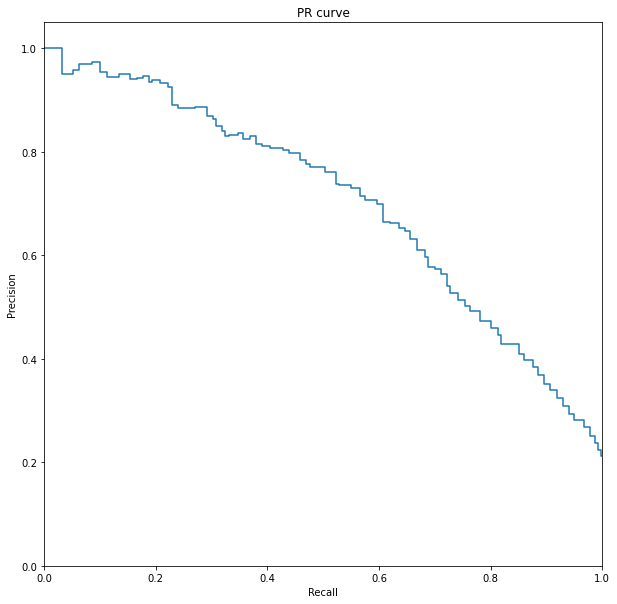

In [54]:
model = RandomForestClassifier(n_estimators=88, random_state=12345)
model.fit(train_features, train_target)
probabilities_valid = model.predict_proba(valid_features)
probabilities_one_valid = probabilities_valid[:,1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid>threshold
    precision = precision_score(valid_target, predicted_valid)
    recall=recall_score(valid_target, predicted_valid)
    f1 = f1_score(valid_target, predicted_valid)
    print("Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f} | F1-score = {:.3f}".format(
        threshold, precision, recall, f1))
    

precision, recall, thresholds = precision_recall_curve(valid_target, probabilities_valid[:, 1])    
plt.figure(figsize=(10, 10))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR curve')
plt.show() 

Changing the threshold did not bring any improvements. Let's evaluate the best model.

In [55]:
# ROC-curve for the best model
model = RandomForestClassifier(n_estimators=88, random_state=12345)
model.fit(features_upsampled, target_upsampled)

RandomForestClassifier(n_estimators=88, random_state=12345)

Let's try to improve the model with help of additional parameters. We will conduct training on an enlarged sample. We will not reduce the threshold or reduce the number of objects. To determine the best parameters we will use **GridSearchCV**

In [56]:
par_grid_ensemble = {'n_estimators':[37,71,88],
                     'criterion':['gini', 'entropy'],
                     'min_samples_split':range(5,15)}

model = RandomForestClassifier(random_state=12345)

grid_search = GridSearchCV(model, par_grid_ensemble, cv=5,scoring='accuracy')
grid_search.fit(features_upsampled, target_upsampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': range(5, 15),
                         'n_estimators': [37, 71, 88]},
             scoring='accuracy')

In [57]:
grid_search.best_params_

{'criterion': 'gini', 'min_samples_split': 5, 'n_estimators': 71}

In [58]:
# Let's test on the validation sample
model_rfc = RandomForestClassifier(random_state=12345, criterion='gini', 
                               min_samples_split=5, n_estimators=71
                              )
model_rfc.fit(features_upsampled, target_upsampled)
predicted_valid = model_rfc.predict(valid_features)
print("F1:", f1_score(valid_target, predicted_valid))

F1: 0.6248175182481751


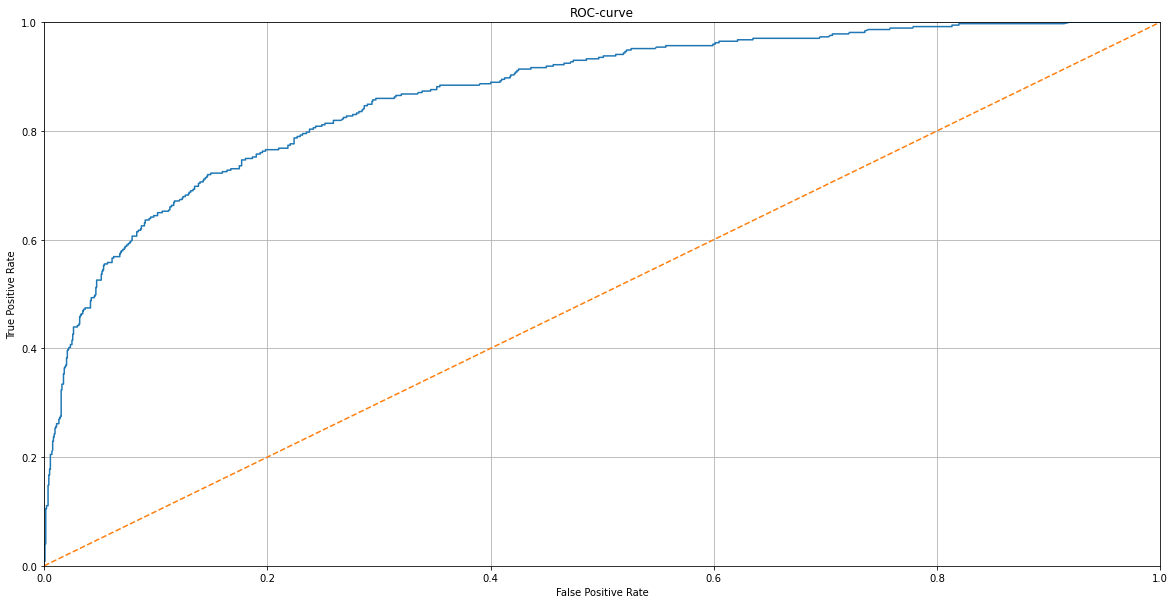

AUC: 0.8693029727831725


In [59]:
probabilities_valid = model_rfc.predict_proba(valid_features)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(valid_target, probabilities_one_valid)

plt.figure(figsize=(20,10))
plt.plot(fpr, tpr)

# ROC-curve of random model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.grid()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-curve")
plt.show()

auc_roc = roc_auc_score (valid_target, probabilities_one_valid)

print("AUC:", auc_roc)

<div style="font-size: 20px">
    
**Intermediate conclusion:**

To eliminate the imbalance of classes , the following techniques were used:

1) Adding weights to increase the overall value of records of departed customers

2) Increasing the number of records about departed clients by duplicating them

3) Reducing the number of records about current customers by discarding them

Based on the presented results table, it can be seen that the best result was achieved by using the **upsampling** technique for a Random Forest model (with the number of solvers equal to 71 of the maximum value of the target metric), but using downsampling does not allow achieving special results. Varying the threshold for the F1 metric did not lead to an improvement in the quality of models

## 4.  Model testing

In [60]:
# Let's concatenate train and validation samples
train_valid_features_normalized = np.concatenate((features_upsampled, valid_features))

target_train_valid_upsampled = np.concatenate((target_upsampled, valid_target))

In [61]:
predicted_test = model_rfc.predict(test_features)

In [62]:
print('Accuracy: {:.3f}'.format(accuracy_score(test_target, predicted_test)))
print('Precision: {:.3f}'.format(precision_score(test_target, predicted_test)))
print('Recall: {:.3f}'.format(recall_score(test_target, predicted_test)))
print('F1: {:.2f}'.format(f1_estimate(test_target, predicted_test)))

Accuracy: 0.848
Precision: 0.656
Recall: 0.534
F1: 0.59


<div style="font-size: 20px">
    
**Final conclusion:**

Under this project, a model was built to predict the client's departure from the bank. For these purposes, 3 types of machine learning models were used:

* static model (random guessing)

* logistic regression

* decision tree

* random forest

When reviewing the data, it was found that there is a class imbalance in the binary classification problem: the number of target clients (who refused the bank's services) is 4 times less than those who remained. To eliminate this imbalance, class weighting was used to add coefficients and increase the significance of instances of target classes, as well as two other approaches: upsampling (expanding the sample) and downsampling (narrowing the sample).

The best result for the F1 metric was obtained based on the upsampling technique with a random forest model with the number of trees equal to 71. In the course of the work, the impact of changing the threshold for the target class was also analyzed in order to adjust the method of classifying the result and increase the F1-metric. There was no improvement in metrics when the threshold was changed. 

However, despite the use of additional parameter, the final result of the metric F1  is 0.59, which satisfies the presented requirements for the project.